In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#increase size of figures
from matplotlib import rcParams

In [10]:
data=pd.read_csv('DataSets/Student Alcohol Consumption Merged.csv')

In [11]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [12]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<AxesSubplot:xlabel='Walc', ylabel='Dalc'>

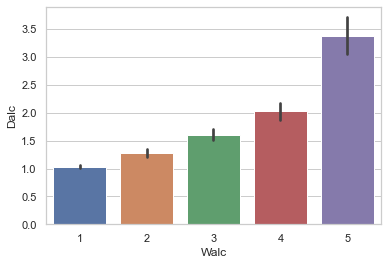

In [18]:
sns.barplot(x='Walc',y='Dalc',data=data)

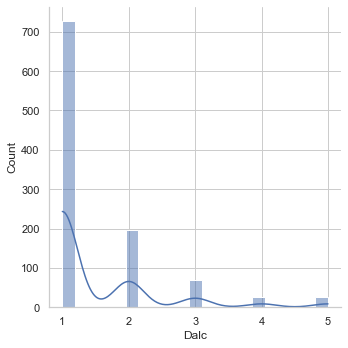

In [15]:
sns.displot(data['Dalc'],kde=True)

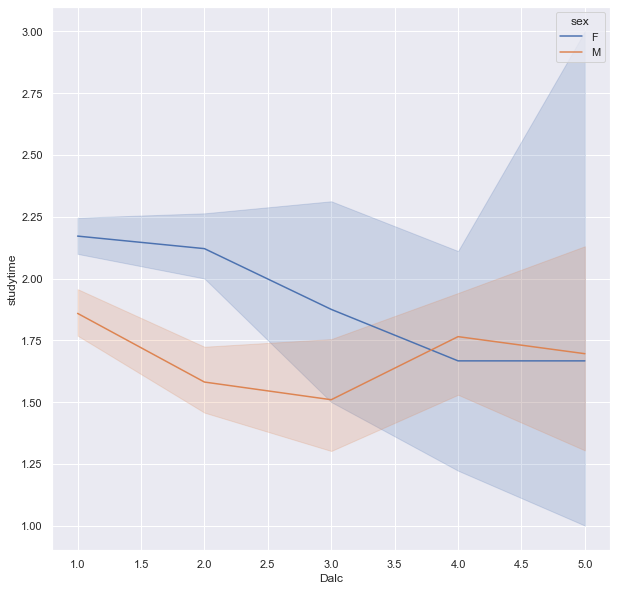

In [44]:
sns.set_theme(style="darkgrid")


# Relatioship between studytime and alcohol consumption during the week
sns.lineplot(x="Dalc", y="studytime",
             hue="sex",
             data=data)
rcParams['figure.figsize'] = 10,10

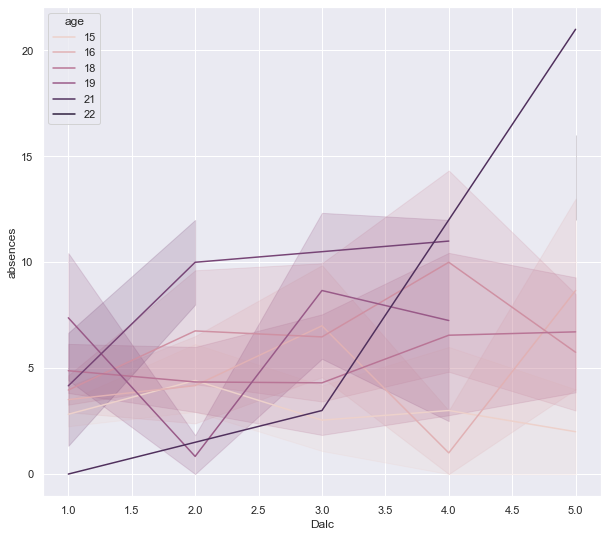

In [43]:
sns.set_theme(style="darkgrid")


# relationship between absences and alcohol consumption
sns.lineplot(x="Dalc", y="absences",
             hue="age",
             data=data)
rcParams['figure.figsize'] = 10,10

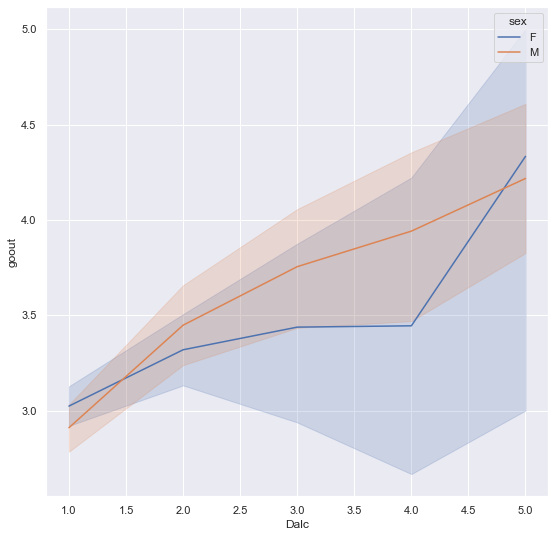

In [41]:
sns.set_theme(style="darkgrid")


# relationship between going out and alcohol consumption during the week
sns.lineplot(x="Dalc", y="goout",
             hue="sex",
             data=data)
rcParams['figure.figsize'] = 7,7

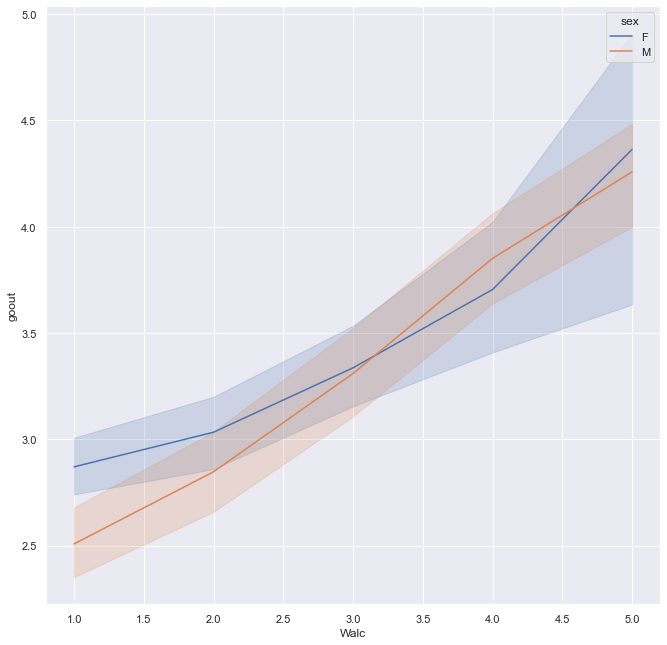

In [36]:
sns.set_theme(style="darkgrid")


# relationship between going out and alcohol consumption on weekends
sns.lineplot(x="Walc", y="goout",
             hue="sex",
             data=data)
rcParams['figure.figsize'] = 11,11

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X=data[['Dalc','freetime','failures','studytime','goout']]

In [47]:
#data to predict
#target
y=data['Walc']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
#Decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dTree = DecisionTreeClassifier()

In [52]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
predictions = dTree.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.57      0.82      0.67       152
           2       0.37      0.28      0.32        93
           3       0.44      0.45      0.44        78
           4       0.56      0.23      0.33        64
           5       0.64      0.45      0.53        31

    accuracy                           0.51       418
   macro avg       0.51      0.45      0.46       418
weighted avg       0.50      0.51      0.49       418



In [ ]:
#Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(n_estimators=200)

In [58]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
rfc_pred = rfc.predict(X_test)

In [60]:
print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[125  22   3   1   1]
 [ 52  24  12   4   1]
 [ 25  12  32   6   3]
 [ 16   5  22  15   6]
 [  1   4   1   8  17]]
              precision    recall  f1-score   support

           1       0.57      0.82      0.67       152
           2       0.36      0.26      0.30        93
           3       0.46      0.41      0.43        78
           4       0.44      0.23      0.31        64
           5       0.61      0.55      0.58        31

    accuracy                           0.51       418
   macro avg       0.49      0.45      0.46       418
weighted avg       0.49      0.51      0.48       418



In [61]:
print(rfc_pred)

[1 1 1 3 1 1 1 1 5 1 2 5 3 1 2 1 1 5 1 1 1 3 1 1 1 1 1 3 2 1 5 4 1 3 1 2 1
 3 2 2 1 1 1 1 1 5 3 1 1 3 5 1 4 1 1 1 5 1 4 5 1 1 2 5 1 1 2 1 1 1 3 4 5 1
 1 1 2 1 3 1 1 1 1 1 1 1 4 2 3 3 1 1 1 1 1 1 3 2 4 1 1 1 2 1 1 1 2 1 1 1 3
 1 3 1 2 1 1 5 1 1 1 1 2 2 1 3 2 2 3 1 4 1 1 2 3 1 1 1 1 1 1 5 2 1 1 3 3 3
 1 1 2 1 1 1 1 1 1 2 1 3 1 4 1 1 1 4 5 2 3 4 3 2 5 3 1 2 1 1 3 4 1 1 3 1 1
 2 1 1 3 1 3 1 5 3 1 1 4 1 1 1 4 3 1 1 1 1 3 3 1 1 1 1 1 2 2 1 5 1 2 3 1 2
 1 1 3 1 1 1 3 4 1 2 3 4 1 2 1 1 3 5 2 5 1 1 1 1 4 2 1 3 1 4 2 3 2 1 2 4 1
 4 1 1 1 3 5 1 3 1 5 2 2 5 1 4 2 3 3 3 2 1 1 1 1 4 1 4 5 1 3 1 1 1 1 1 3 1
 3 2 4 1 1 2 3 1 4 4 3 3 1 1 1 1 2 2 3 2 1 1 1 1 1 4 5 2 2 1 1 1 5 1 2 1 2
 1 3 2 3 3 1 1 1 2 1 1 2 1 2 3 3 2 1 5 3 3 1 1 2 1 1 2 5 3 4 1 2 2 1 4 2 1
 3 1 1 1 5 1 2 3 3 1 2 1 1 1 1 1 1 1 2 4 4 1 4 2 1 1 1 3 2 3 1 4 3 1 3 4 1
 5 1 3 1 1 4 3 1 2 3 2]


In [62]:
newdf=pd.DataFrame({'Actual':y, 'Predicted':y_train})
newdf

,Actual,Predicted
0,1,NaN
1,1,1.0
2,3,NaN
3,1,1.0
4,2,2.0
...,...,...
1039,2,2.0
1040,1,NaN
1041,1,1.0
1042,4,4.0
